 ### COVID-19 Patient Data – Exploratory Data Analysis (EDA)

#### Task Overview: 
- This project aims to perform a comprehensive Exploratory Data Analysis (EDA) on a large-scale COVID-19 patient dataset. The dataset includes over 1 million patient records with clinical and demographic features.
- The raw dataset consists of 21 unique features and 1,048,576 unique patients. The goal is to uncover insights into patient outcomes, comorbidities, treatment types, and mortality risk factors.

#### Objectives
- Understand the distribution of patient characteristics (age, sex, medical unit, comorbidities).
- Analyze mortality trends based on age, sex, ICU admission, and underlying health conditions.
- Explore the relationships between intubation, ICU admission, and patient outcomes.
- Identify correlations among features to find potential predictors of severe COVID-19 cases.
- Detect and visualize missing values, outliers, and data imbalances.

#### Key Dataset Features
Demographic: SEX, AGE, PREGNANT

Comorbidities: DIABETES, COPD, ASTHMA, OBESITY, etc.

Outcomes: DATE_DIED, ICU, INTUBED, CLASIFFICATION_FINAL

Treatment context: USMER, MEDICAL_UNIT, PATIENT_TYPE


- For Analysis and Visualization the tools that we are going to use are Numpy, Pandas, Seaborn, Matplotlib for heatmaps, count plots, box plots, violin plots, etc.


#### Outcomes
- Cleaned and processed dataset
- Visual dashboards summarizing key insights
- EDA report or Jupyter notebook with detailed commentary

# Description of the columns

| Column Name            | Description (inferred from name)             | Data Type         |
| ---------------------- | -------------------------------------------- | ----------------- |
| `USMER`                | Medical monitoring unit (likely binary)      | `int64`           |
| `MEDICAL_UNIT`         | Medical unit code                            | `int64`           |
| `SEX`                  | Gender (1 = Male, 2 = Female)                | `int64`           |
| `PATIENT_TYPE`         | Type of patient (e.g., inpatient/outpatient) | `int64`           |
| `DATE_DIED`            | Date of death or "9999-99-99" if alive       | `object` (string) |
| `INTUBED`              | Intubation status                            | `int64`           |
| `PNEUMONIA`            | Pneumonia status                             | `int64`           |
| `AGE`                  | Age in years                                 | `int64`           |
| `PREGNANT`             | Pregnancy status                             | `int64`           |
| `DIABETES`             | Diabetes status                              | `int64`           |
| `COPD`                 | Chronic Obstructive Pulmonary Disease        | `int64`           |
| `ASTHMA`               | Asthma status                                | `int64`           |
| `INMSUPR`              | Immunosuppression                            | `int64`           |
| `HIPERTENSION`         | Hypertension                                 | `int64`           |
| `OTHER_DISEASE`        | Other diseases                               | `int64`           |
| `CARDIOVASCULAR`       | Cardiovascular disease                       | `int64`           |
| `OBESITY`              | Obesity status                               | `int64`           |
| `RENAL_CHRONIC`        | Chronic kidney disease                       | `int64`           |
| `TOBACCO`              | Tobacco use                                  | `int64`           |
| `CLASIFFICATION_FINAL` | Final classification (COVID-19 status)       | `int64`           |
| `ICU`                  | ICU admission status                         | `int64`           |


### Metadata summary of my COVID dataset

| Column Name               | Data Type | Non-Null Count | Description (inferred)                                                |
| ------------------------- | --------- | -------------- | --------------------------------------------------------------------- |
| **USMER**                 | int64     | 1,048,575      | Whether treated at a USMER (disease surveillance unit); likely binary |
| **MEDICAL\_UNIT**         | int64     | 1,048,575      | Type of medical unit where treated                                    |
| **SEX**                   | int64     | 1,048,575      | Patient's sex (1 = Male, 2 = Female)                                  |
| **PATIENT\_TYPE**         | int64     | 1,048,575      | Type of patient (1 = Inpatient, 2 = Outpatient)                       |
| **DATE\_DIED**            | object    | 1,048,575      | Date of death or placeholder (e.g., "9999-99-99") if alive            |
| **INTUBED**               | int64     | 1,048,575      | Whether patient was intubated (1 = Yes, 2 = No, 97 = Unknown)         |
| **PNEUMONIA**             | int64     | 1,048,575      | Whether patient had pneumonia                                         |
| **AGE**                   | int64     | 1,048,575      | Age of the patient                                                    |
| **PREGNANT**              | int64     | 1,048,575      | Pregnancy status (only relevant for females)                          |
| **DIABETES**              | int64     | 1,048,575      | Presence of diabetes                                                  |
| **COPD**                  | int64     | 1,048,575      | Chronic obstructive pulmonary disease status                          |
| **ASTHMA**                | int64     | 1,048,575      | Asthma condition                                                      |
| **INMSUPR**               | int64     | 1,048,575      | Immunosuppression condition                                           |
| **HIPERTENSION**          | int64     | 1,048,575      | High blood pressure (hypertension)                                    |
| **OTHER\_DISEASE**        | int64     | 1,048,575      | Other comorbidities present                                           |
| **CARDIOVASCULAR**        | int64     | 1,048,575      | Cardiovascular disease presence                                       |
| **OBESITY**               | int64     | 1,048,575      | Obesity status                                                        |
| **RENAL\_CHRONIC**        | int64     | 1,048,575      | Chronic kidney disease                                                |
| **TOBACCO**               | int64     | 1,048,575      | History of tobacco use                                                |
| **CLASIFFICATION\_FINAL** | int64     | 1,048,575      | COVID-19 diagnosis classification                                     |
| **ICU**                   | int64     | 1,048,575      | Whether admitted to ICU (1 = Yes, 2 = No, 97 = Unknown)               |

Columns often use coded values:

- 1: Yes / Positive
- 2: No / Negative
- 97, 98, 99: May represent Unknown, Not Applicable, or Missing

### Import necessary libraries

In [1]:
# Importing Libraries

import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns
sns.set_palette('Set3')

import warnings
warnings.filterwarnings("ignore")

### Data Profiling

In [227]:
# Loading the dataset
df= pd.read_csv(r"C:\Users\sahua\OneDrive\Desktop\Data_science\Celebal Technology\Week4_Task\Covid Data.csv")
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [228]:
# Showing First 5 Rows
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [229]:
# Showing Last 5 Rows
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [230]:
# Showing No. of Rows and Columns of Dataset
df.shape

(1048575, 21)

In [231]:
# Coverting the Name of Columns to lower Case
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died', 'intubed',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

In [232]:
# Checking Data Types
df.dtypes

usmer                    int64
medical_unit             int64
sex                      int64
patient_type             int64
date_died               object
intubed                  int64
pneumonia                int64
age                      int64
pregnant                 int64
diabetes                 int64
copd                     int64
asthma                   int64
inmsupr                  int64
hipertension             int64
other_disease            int64
cardiovascular           int64
obesity                  int64
renal_chronic            int64
tobacco                  int64
clasiffication_final     int64
icu                      int64
dtype: object

In [233]:
# Showing information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [234]:
# Checking Descriptive Statistics of Numerical Columns
df.describe()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [235]:
df.nunique()

usmer                     2
medical_unit             13
sex                       2
patient_type              2
date_died               401
intubed                   4
pneumonia                 3
age                     121
pregnant                  4
diabetes                  3
copd                      3
asthma                    3
inmsupr                   3
hipertension              3
other_disease             3
cardiovascular            3
obesity                   3
renal_chronic             3
tobacco                   3
clasiffication_final      7
icu                       4
dtype: int64

### Data Preprocessing

In [236]:
# Checking Duplicated Values 
df.duplicated().sum()

812049

There are many identical rows which will have to be dropped.

In [237]:
# Dropping Duplicated Values
df = df.drop_duplicates()
df

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


In [238]:
# Resetting index
df.reset_index(drop=True,inplace=True)
df

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236521,1,13,2,1,9999-99-99,97,2,47,97,1,...,2,2,2,2,2,2,2,2,7,97
236522,1,13,1,2,9999-99-99,2,2,56,2,1,...,2,2,2,2,2,2,2,2,7,2
236523,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
236524,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97


After Dropping Duplicated Rows the no. of rows turned into 236526 rows.

In [239]:
# Checking null valuse 
df.isna().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
date_died               0
intubed                 0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
icu                     0
dtype: int64

Hence there is no null value found.

The above data shows -
1. There are total of 236526 rows and 21 columns in a data . 
2. All of the columns are int data type except one i.e.. date_died.
3. date_died column are in the object data type.

In [240]:
# Finding unique values of all the columns
df.apply(np.unique)

usmer                                                              [1, 2]
medical_unit                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
sex                                                                [1, 2]
patient_type                                                       [1, 2]
date_died               [01/01/2021, 01/02/2020, 01/02/2021, 01/03/202...
intubed                                                    [1, 2, 97, 99]
pneumonia                                                      [1, 2, 99]
age                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
pregnant                                                   [1, 2, 97, 98]
diabetes                                                       [1, 2, 98]
copd                                                           [1, 2, 98]
asthma                                                         [1, 2, 98]
inmsupr                                                        [1, 2, 98]
hipertension                          

In this it can be seen that some of the columns containing 97, 98, 99 values which means the values are missing. 

It also contains values like 1 and 2 which for most of the columns like intubed, pneumonia, pregnant, diabetes, copd, asthama, hipertension, other_disease, cardiovascualar, obesity, renal_chronic, tobacco where
1. 1 implies 'YES'
2. 2 implies 'NO'

The'date died' column contains different values for dead people their death date is mentioned and the people who are alive , for them '9999-99-99' is mentioned. 

This we will fix with data cleaning.

#### Finding missing values in the columns

In [241]:
# count of missing values with 97
df[df == 97.0].count()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
date_died                    0
intubed                  99882
pneumonia                    0
age                        121
pregnant                129503
diabetes                     0
copd                         0
asthma                       0
inmsupr                      0
hipertension                 0
other_disease                0
cardiovascular               0
obesity                      0
renal_chronic                0
tobacco                      0
clasiffication_final         0
icu                      99882
dtype: int64

In [242]:
# count of missing values with 98
df[df == 98.0].count()

usmer                      0
medical_unit               0
sex                        0
patient_type               0
date_died                  0
intubed                    0
pneumonia                  0
age                      103
pregnant                1954
diabetes                2840
copd                    2529
asthma                  2506
inmsupr                 2926
hipertension            2620
other_disease           4362
cardiovascular          2603
obesity                 2554
renal_chronic           2531
tobacco                 2738
clasiffication_final       0
icu                        0
dtype: int64

In [243]:
# count of missing values with 99
df[df == 99.0].count()

usmer                      0
medical_unit               0
sex                        0
patient_type               0
date_died                  0
intubed                 5505
pneumonia               7187
age                       84
pregnant                   0
diabetes                   0
copd                       0
asthma                     0
inmsupr                    0
hipertension               0
other_disease              0
cardiovascular             0
obesity                    0
renal_chronic              0
tobacco                    0
clasiffication_final       0
icu                     5654
dtype: int64

In [244]:
# replacing all the missing values into nan values
df.replace([97,98,99], np.nan , inplace=True)

In [245]:
df.isna().sum()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
date_died                    0
intubed                 105387
pneumonia                 7187
age                        308
pregnant                131457
diabetes                  2840
copd                      2529
asthma                    2506
inmsupr                   2926
hipertension              2620
other_disease             4362
cardiovascular            2603
obesity                   2554
renal_chronic             2531
tobacco                   2738
clasiffication_final         0
icu                     105536
dtype: int64

#### Data Cleaning

In [246]:
# Counting values of 'date_died' column
df['date_died'].value_counts()

date_died
9999-99-99    160561
07/07/2020       984
06/07/2020       980
13/07/2020       970
16/06/2020       960
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: count, Length: 401, dtype: int64

In this column,  the value '9999-99-99' depicts the missing values . It means these people are alive .The first needed action is to create a target variable based on date_died column.

In [247]:
# data cleaning in date-died column
df.date_died[df['date_died'] != '9999-99-99'] = 'Died'
df.date_died[df['date_died'] == '9999-99-99'] = 'Alive'
df.date_died.value_counts()

date_died
Alive    160561
Died      75965
Name: count, dtype: int64

Adding a New Column

In [248]:
# Adding a new column 'death'
df['death'] = df.date_died
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,death
0,2,1,1,1,Died,NaN,1.0,65.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,Died
1,2,1,2,1,Died,NaN,1.0,72.0,NaN,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN,Died
2,2,1,2,2,Died,1.0,2.0,55.0,NaN,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0,Died
3,2,1,1,1,Died,NaN,2.0,53.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN,Died
4,2,1,2,1,Died,NaN,2.0,68.0,NaN,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN,Died


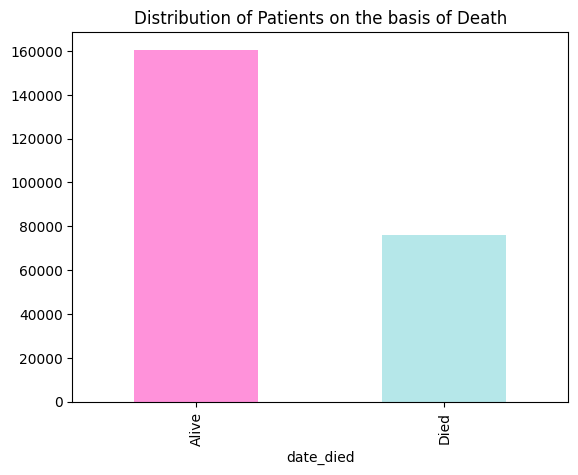

In [249]:
# Plotting Barplot for date-died Column to check the ratio of people on the basis of their death
df['date_died'].value_counts().plot(kind='bar',color=('#FF92DA','#B5E7E9'), title = 'Distribution of Patients on the basis of Death')
plt.show()

Both the Columns 'date-died' and 'death' are similar so we drop 'date_died' column

In [250]:
# dropping date_died column
df.drop(['date_died'],axis=1,inplace=True)
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'intubed', 'pneumonia',
       'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu', 'death'],
      dtype='object')

It is clearly seen that 'date_died' column has been droppped. 

In [251]:
# counting values of sex column
df['sex'].value_counts()

sex
2    129503
1    107023
Name: count, dtype: int64

It is mentioned in the data 1 is for female and 2 is for Male. so Replacing the values with male and female.

In [269]:
# Replacing the values
df['sex'].replace({1:'Female', 2:'Male'}, inplace = True)
df['sex'].value_counts()

sex
Male      129503
Female    107023
Name: count, dtype: int64

In [258]:
# counting values of pregnant column
df['pregnant'].value_counts()

pregnant
2.0    102049
1.0      3020
Name: count, dtype: int64

Parsing the missing values of Pregnant column


In [192]:
df.groupby(['sex','pregnant'])[['sex']].count()

sex
sex    pregnant       
Female 1.0        2788
       2.0       95734

In [174]:
# Checking null values in the pregnant column 
df['pregnant'].isna().sum()

131457

In [256]:
# counting values of 'patient_type' column
df['patient_type'].value_counts()

patient_type
2    136644
1     99882
Name: count, dtype: int64

It is mentioned in the data that value 1 is for 'Not Hospitalized' and 2 is for 'Hospitalized'. So Replacing the values with their respective names.

In [259]:
# data cleaning in 'patient_type' column
df['patient_type'].replace({1: 'Not Hospitalized',2: 'Hospitalized'}, inplace = True)
df['patient_type'].value_counts()

patient_type
Hospitalized        136644
Not Hospitalized     99882
Name: count, dtype: int64

Parsing the missing values of 'intubed' and 'icu' column 

In [260]:
df.groupby(['patient_type','intubed'])[['patient_type']].count()

patient_type
patient_type intubed              
Hospitalized 1.0             32295
             2.0             98844

In [178]:
df.groupby(['patient_type','icu'])[['patient_type']].count()

patient_type
patient_type icu              
Hospitalized 1.0         15383
             2.0        115607

In [262]:
# counting values of 'clasiffication_final' column
df['clasiffication_final'].value_counts()

clasiffication_final
3    106712
7     77075
6     33629
5     10900
1      4730
2      1846
4      1634
Name: count, dtype: int64

In [263]:
# data cleaning in clasiffication_final column
df['clasiffication_final'] = np.where(
    df['clasiffication_final'] >= 4, 'Carrier or inconclusive', df['clasiffication_final'])

In [264]:
# checking unique values of clasiffication_final Column
df['clasiffication_final'].unique()

array(['3', 'Carrier or inconclusive', '1', '2'], dtype=object)

In [266]:
df.isna().sum()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
intubed                 105387
pneumonia                 7187
age                        308
pregnant                131457
diabetes                  2840
copd                      2529
asthma                    2506
inmsupr                   2926
hipertension              2620
other_disease             4362
cardiovascular            2603
obesity                   2554
renal_chronic             2531
tobacco                   2738
clasiffication_final         0
icu                     105536
death                        0
dtype: int64

The most number of null values are in 'intubed' and 'icu' column so we will drop these two columns . But before dropping , first we will check distribution of patients on the basis of connected to ventilator and admitted to icu. 

Showing Distribution of patients connected to the  Ventilator

In [183]:
df['intubed'].value_counts()

intubed
2.0    98844
1.0    32295
Name: count, dtype: int64

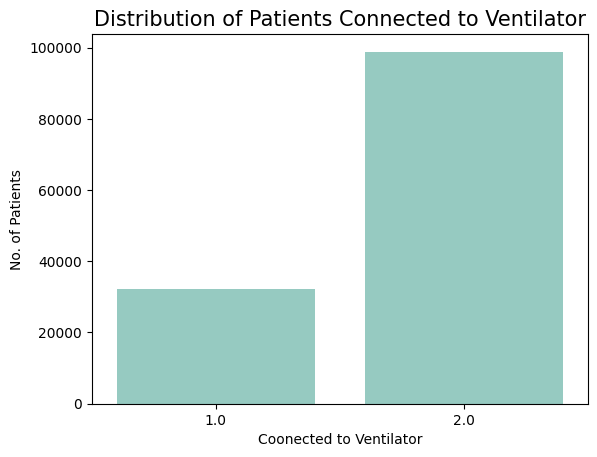

In [184]:
sns.countplot(x= df['intubed'])
plt.title('Distribution of Patients Connected to Ventilator', fontsize = 15)
plt.xlabel('Coonected to Ventilator')
plt.ylabel('No. of Patients')
plt.show()

This plot shows 2 is more than 1 which means less no. of patients are connected to ventilator.

Showing Distribution of Patients admitted to ICU.

In [267]:
df['icu'].value_counts()

icu
2.0    115607
1.0     15383
Name: count, dtype: int64

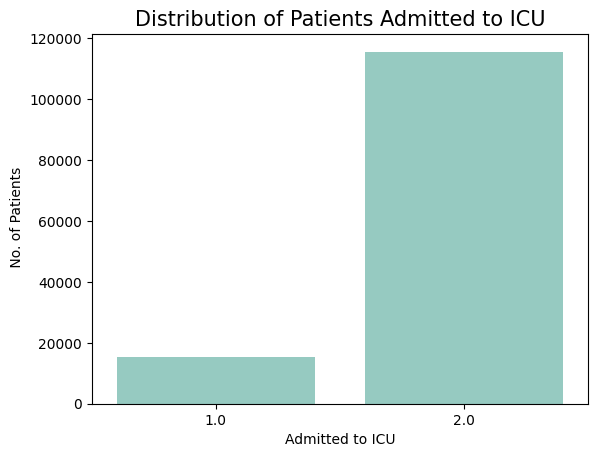

In [220]:
sns.countplot(x= df['icu'])
plt.title('Distribution of Patients Admitted to ICU',fontsize=15)
plt.xlabel('Admitted to ICU')
plt.ylabel(' No. of Patients')
plt.show()

This plot shows 2 is more than 1 which implies that only 15383 patients are admitted in the ICU out of 130990 patients

There are so many null values in ICU and intubed column so we are going to drop these two columns.


In [268]:
# dropping columns
df.drop(columns=["intubed","icu"], inplace=True)
df.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'pneumonia', 'age',
       'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'clasiffication_final', 'death'],
      dtype='object')

In [272]:
# Dropping null values
df = df.dropna(how='any',axis = 0)
df.isna().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
death                   0
dtype: int64

In [270]:
# Statistical Information of all the numerical columns
df.describe()

,usmer,medical_unit,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
count,236526.000000,236526.000000,229339.000000,236218.000000,105069.000000,233686.000000,233997.000000,234020.000000,233600.000000,233906.000000,232164.000000,233923.000000,233972.000000,233995.000000,233788.00000
mean,1.512337,7.634230,1.565142,52.561261,1.971257,1.684380,1.939875,1.931476,1.947389,1.623759,1.915663,1.923432,1.729335,1.926904,1.86045
std,0.499849,3.661318,0.495739,19.262141,0.167084,0.464763,0.237718,0.252644,0.223257,0.484443,0.277893,0.265905,0.444304,0.260294,0.34652
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
25%,1.000000,4.000000,1.000000,40.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.00000
50%,2.000000,6.000000,2.000000,54.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
75%,2.000000,12.000000,2.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000
max,2.000000,13.000000,2.000000,121.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000


In [271]:
# information of categorical columns
df.describe(include='O')

,sex,patient_type,clasiffication_final,death
count,236526,236526,236526,236526
unique,2,2,4,2
top,Male,Hospitalized,Carrier or inconclusive,Alive
freq,129503,136644,123238,160561


### Exploratory Data analysis

#### Diabetes Column

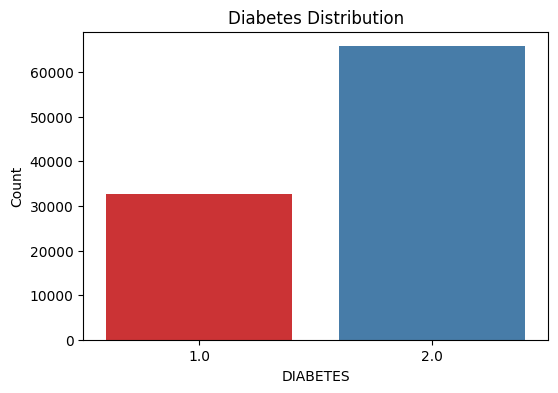

In [134]:
# Diabetes count
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df, palette='Set1')
plt.title('Diabetes Distribution')
plt.xlabel('DIABETES')
plt.ylabel('Count')
plt.show()

- This count plot shows the number of patients with (1) and without (2) diabetes.
- The bar for 2 is significantly higher, it means most patients do not have diabetes.

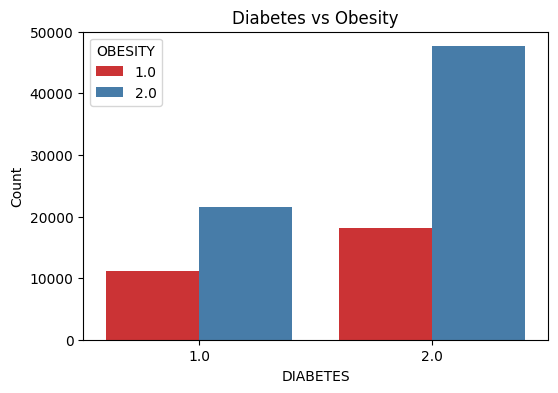

In [137]:
# Diabetes vs Obesity
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', hue='obesity', data=df, palette='Set1')
plt.title('Diabetes vs Obesity')
plt.xlabel('DIABETES')
plt.ylabel('Count')
plt.legend(title='OBESITY')
plt.show()

This plot shows how obesity is distributed among diabetic and non-diabetic patients.

#### Sex Column

1. Percentage Distribution of Patients Sex wise

In [253]:
df['sex'].value_counts()

sex
Male      129503
Female    107023
Name: count, dtype: int64

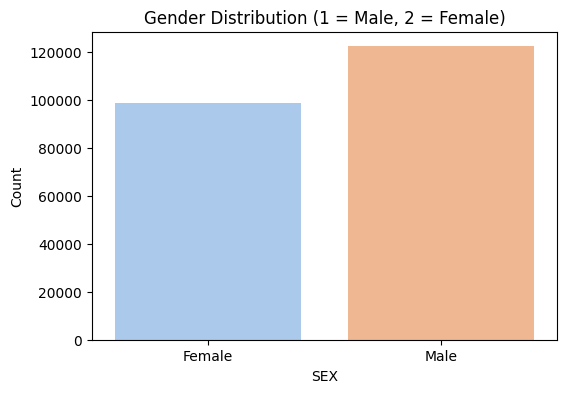

In [73]:
# 2. Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Distribution (1 = Male, 2 = Female)')
plt.xlabel('SEX')
plt.ylabel('Count')
plt.show()

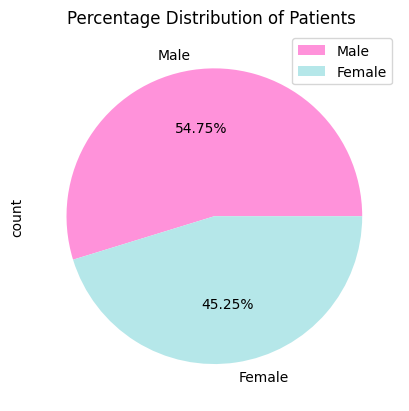

In [254]:
df['sex'].value_counts().plot(kind='pie' , autopct = '%.2f%%', colors=('#FF92DA','#B5E7E9'), title='Percentage Distribution of Patients ')
plt.legend(df['sex'].value_counts().index)
plt.show()

This Plot Shows the percentage male contains the larger part which is around 55.39% than females which is around 44.61%

2. Sex Wise Distribution of Patients on the basis of Death.

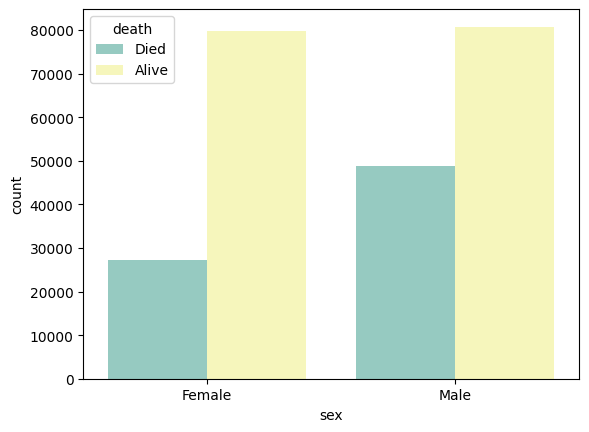

In [255]:
sns.countplot(data=df , x = 'sex', hue= 'death')
plt.show()

This Plot clearly shows that rate of male in terms of death is higher than females  which implies more males were died as compraed to females.

3. Sex wise Distribution of Patients on the basis of Patient_type

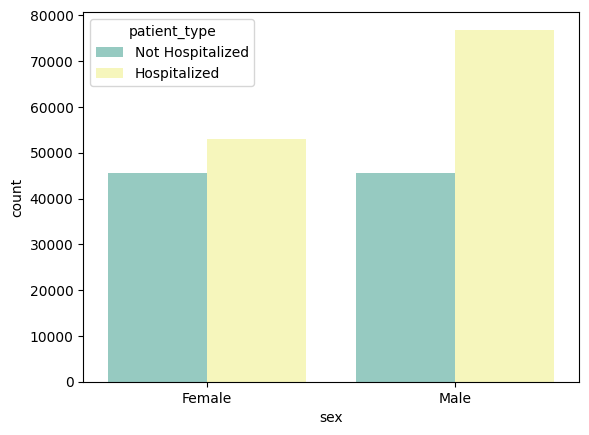

In [52]:
sns.countplot(data = df , x = 'sex' , hue = 'patient_type')
plt.show()

This plot clearly Shows that more males are hospitalized as compared to females in the Covid Period.

4. Average Distribution of Different Diseases Sex Wise

In [53]:
d1 = df.groupby(['sex'])[['pneumonia','diabetes','copd','asthma','inmsupr','hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic']].mean()
d1

,pneumonia,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic
sex,,,,,,,,,,
Female,1.606961,1.667587,1.934624,1.910051,1.938440,1.598171,1.901423,1.921175,1.702452,1.925174
Male,1.523674,1.686847,1.943718,1.949448,1.953977,1.631595,1.926666,1.922922,1.745917,1.925300


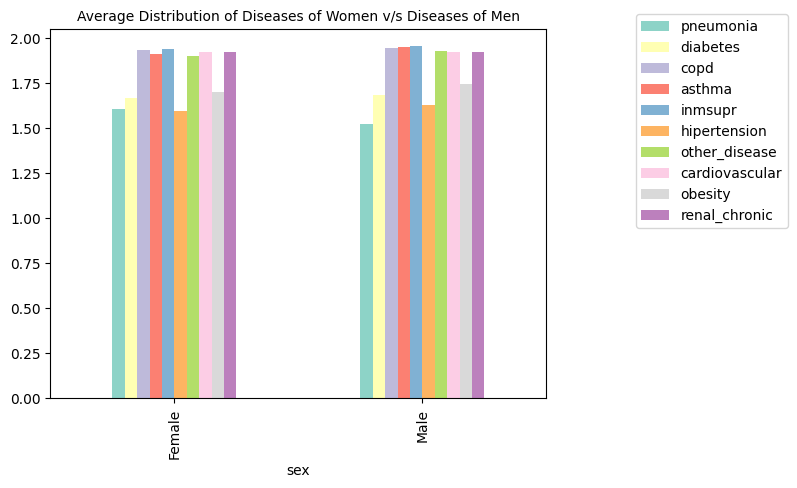

In [54]:
d1.plot(kind = 'bar')
plt.title('Average Distribution of Diseases of Women v/s Diseases of Men', fontsize=10)
plt.legend(loc='right', bbox_to_anchor=(1,0.5,0.5,0.5))
plt.show()

This plot clearly shows :-

1. Pneumonia - Female Patients are more than Male Patients
2. Diabetes - Male are more diabetic than Females
3. copd - Ratio of Males for Chronic obstructive pulmonary disease a bit more than Females.
4. Asthama - Male Patients are more than Female ones.
5. inmsupr - Males are more immunosuppressed than females
6. Hypertension - Male Patients are more than females
7. Other_Diseases - Male Patients are more than Females
8. Cardiovascular - Male Patients are Equal to Female Patients
9. Obesity - Male are more Obese than Females
10. Renal_Chronic - Male Patients are equal to Female Patients

#### Age Column

1. Age Distribution

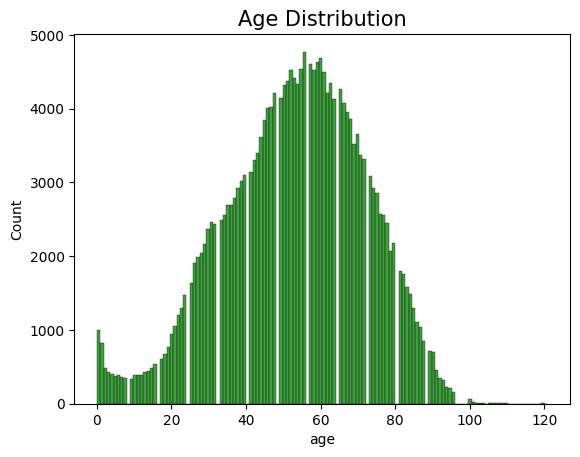

In [55]:
sns.histplot(df['age'],color=('g'))
plt.title('Age Distribution', fontsize=15)
plt.show()

Patients are Roughly Between 20 - 60 Years Old

2. Age Distribution Death Wise

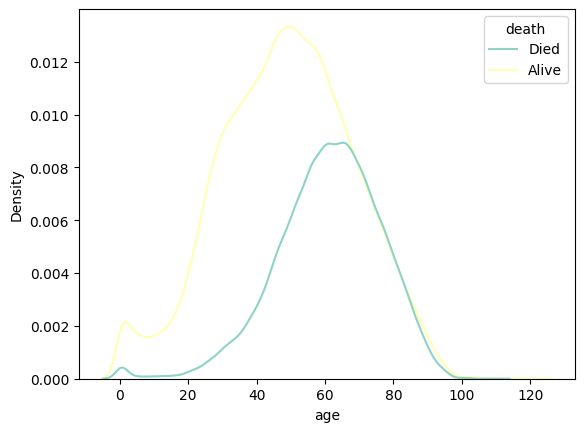

In [56]:
sns.kdeplot(data = df, x = 'age', hue = 'death')
plt.show()

It is clearly shown from this plot that Older Patients are more likely to die compare to younger ones. 

3. Age Distribution Patient_type wise

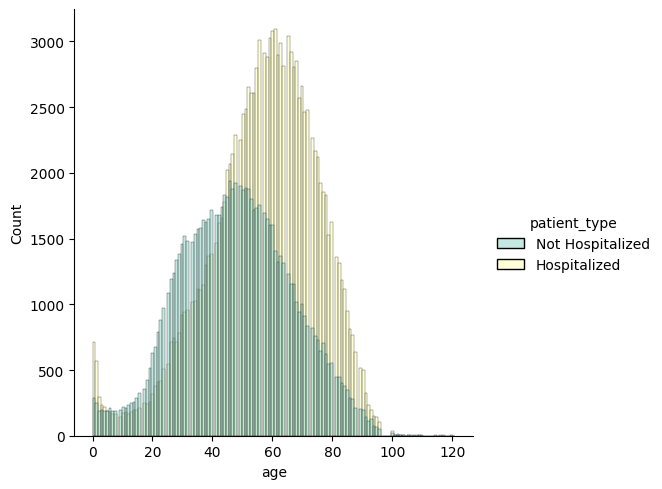

In [57]:
sns.displot(data = df , x = 'age' , hue = 'patient_type')
plt.show()

This plot clearly shows that patients ranging between 40-60 ages are more hospitalized

4. Distribution of Patients Consuming Tobacco Age wise

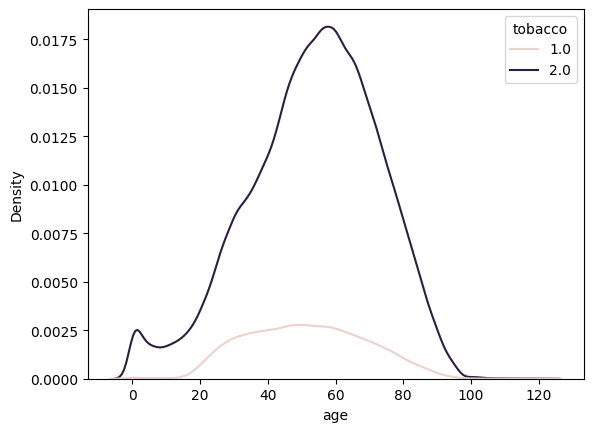

In [58]:
sns.kdeplot(data = df, x = 'age', hue = 'tobacco')
plt.show()

This plot Shows Age range between 30-70 Consumes more tobacco>

6. Distribution of Asthma Patients Age wise

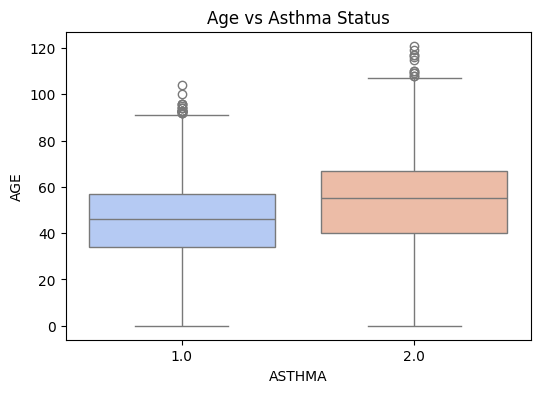

In [290]:
# Age vs Asthma
plt.figure(figsize=(6, 4))
sns.boxplot(x='asthma', y='age', data=df, palette='coolwarm')
plt.title('Age vs Asthma Status')
plt.xlabel('ASTHMA')
plt.ylabel('AGE')
plt.show()

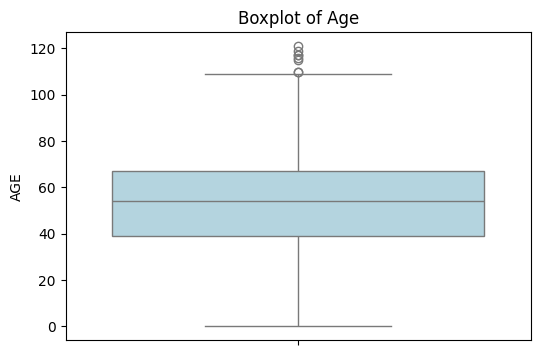

In [286]:
# Boxplot for Age
plt.figure(figsize=(6, 4))
sns.boxplot(y='age', data=df, color='lightblue')
plt.title('Boxplot of Age')
plt.ylabel('AGE')
plt.show()

#### Death Column

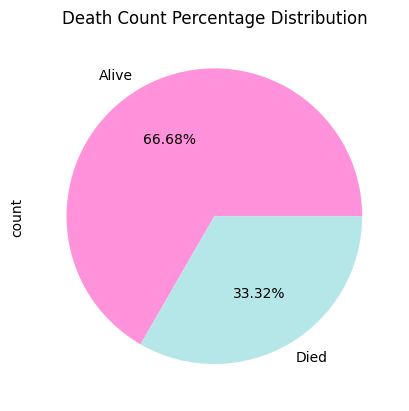

In [87]:
# Plotting percentage distribution of death. 
df['death'].value_counts().plot(kind='pie', autopct='%.2f%%', title = 'Death Count Percentage Distribution', colors=('#FF92DA','#B5E7E9'))
plt.show()

This plot clearly shows that 67.88% of the people are alive.

1. Sex and Death Wise Average Distribution of Different Diseases.

In [59]:
d2 = df.groupby(['death','sex'])[['pneumonia','diabetes','asthma','hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic','copd','inmsupr']].mean()
d2

pneumonia  diabetes    asthma  hipertension  other_disease  \
death sex                                                                  
Alive Female   1.718584  1.701877  1.887788      1.632486       1.891709   
      Male     1.669632  1.705829  1.926674      1.640866       1.913982   
Died  Female   1.301021  1.573604  1.971067      1.504120       1.928048   
      Male     1.291675  1.656675  1.985648      1.616858       1.946826   

              cardiovascular   obesity  renal_chronic      copd   inmsupr  
death sex                                                                  
Alive Female        1.915481  1.689409       1.929584  1.934252  1.931357  
      Male          1.909188  1.717722       1.921640  1.936782  1.943361  
Died  Female        1.936781  1.738201       1.913088  1.935642  1.957854  
      Male          1.944751  1.790733       1.931119  1.954743  1.970852

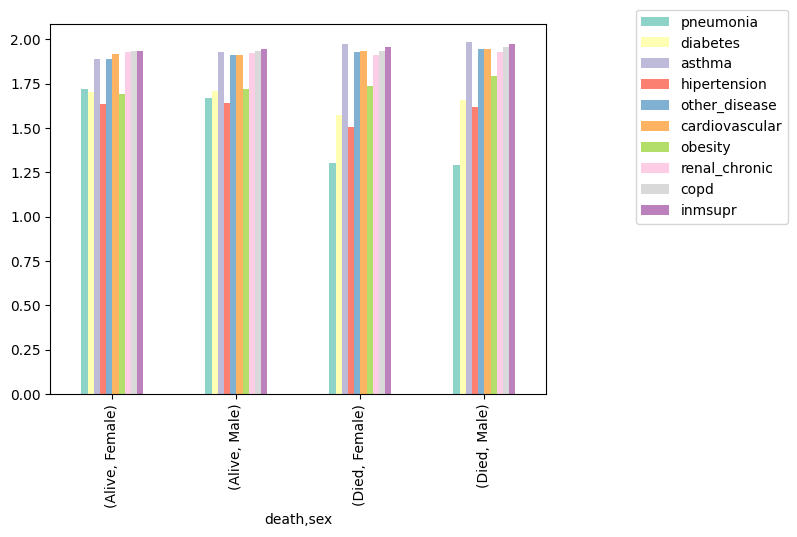

In [60]:
d2.plot(kind='bar')
plt.legend(loc='right' , bbox_to_anchor = (1,0.5,0.5,0.5))
plt.show()

We will talk about Effect of Different Diseases leads to death on the basis of Gender.
1. pneumonia - More Female Patients were died as compared to Male
2. diabetes - More Male Patients were died as compared to Female
3. asthama -  More Male Patients were died as compared to Female
4. hypertension - More Male Patients were died as compared to Female
5. other_disease - More Male Patients were died as compared to Female
6. cardiovascular - More Male Patients were died as compared to Female
7. obesity - More Male Patients were died as compared to Female
8. renal_chronic - More Male Patients were died as compared to Female
9. copd - More Male Patients were died as compared to Female
10. inmsupr - More Male Patients were died as compared to Female

#### Tobacco Column

2. Distribution of Patients Consuming Tobacco Gender wise

As I haved already mentioned before -

1 implies Yes and 2 implies No

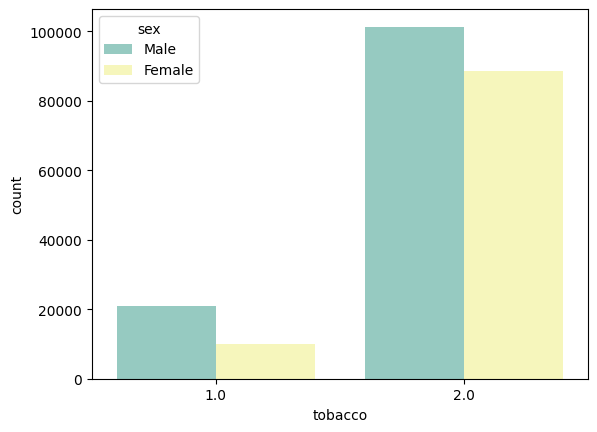

In [61]:
sns.countplot(data = df , x = 'tobacco', hue= 'sex')
plt.show()

This plot clearly shows there are very few  Female Patients who are consuming Tobacco than Males.

#### Patient_type Column

Patient_Type Count Distribution

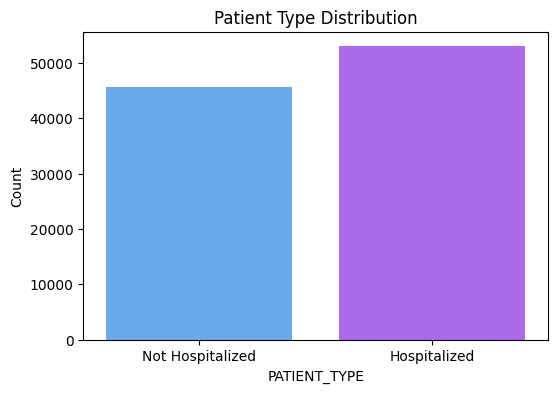

In [282]:
# Patient type distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='patient_type', data=df, palette='cool')
plt.title('Patient Type Distribution')
plt.xlabel('PATIENT_TYPE')
plt.ylabel('Count')
plt.show()

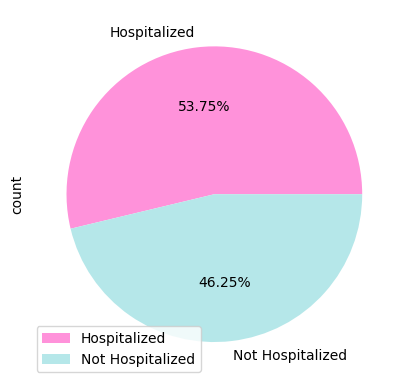

In [141]:
df['patient_type'].value_counts().plot(kind='pie' , autopct = '%.2f%%', colors=('#FF92DA','#B5E7E9'))
plt.legend(df['patient_type'].value_counts().index)
plt.show()

This Plot Shows 58.78% of Patients are hospitalized

#### Clasiffication_final Column

In [63]:
df['clasiffication_final'].value_counts()

clasiffication_final
Carrier or inconclusive    111036
3                          103476
1                            4546
2                            1794
Name: count, dtype: int64

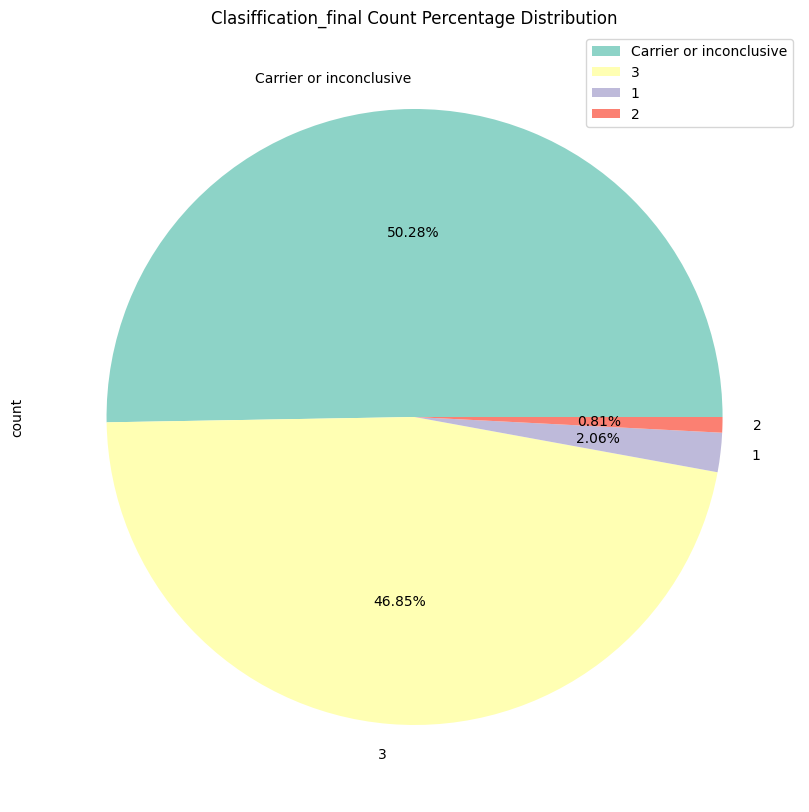

In [64]:
plt.figure(figsize=(10,10))
df['clasiffication_final'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Clasiffication_final Count Percentage Distribution')
plt.legend(df['clasiffication_final'].value_counts().index)
plt.show()

This Plot shows more than 50 % of the patients were not covid carrier.

In [69]:
# showing the correlation table
# This will drop all non-numeric columns automatically
numeric_df = df.select_dtypes(include='number')

# Now compute correlation
corr = numeric_df.corr()
corr


,usmer,medical_unit,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
usmer,1.000000,0.033314,0.095318,-0.038204,-0.010774,0.022434,-0.003648,-0.014841,-0.014513,0.020829,-0.008509,-0.012104,-0.025910,0.021463,-0.023295
medical_unit,0.033314,1.000000,-0.048240,-0.071780,-0.023367,0.019020,-0.009620,-0.032410,-0.008491,0.054757,0.078402,-0.029475,-0.030360,0.033160,-0.033069
pneumonia,0.095318,-0.048240,1.000000,-0.179875,-0.060098,0.065355,-0.009135,-0.119340,-0.037160,0.033824,-0.060295,-0.037372,-0.030552,-0.006755,-0.070389
age,-0.038204,-0.071780,-0.179875,1.000000,0.140501,-0.217863,-0.162789,0.126060,0.061037,-0.295622,0.058353,-0.086763,0.052287,-0.031521,0.036315
pregnant,-0.010774,-0.023367,-0.060098,0.140501,1.000000,-0.059820,-0.024735,-0.000634,-0.011525,-0.071044,0.012847,-0.026952,-0.024607,-0.027822,-0.027943
diabetes,0.022434,0.019020,0.065355,-0.217863,-0.059820,1.000000,0.040927,-0.053509,-0.008951,0.280267,-0.045460,0.049074,0.045982,0.129213,-0.027535
copd,-0.003648,-0.009620,-0.009135,-0.162789,-0.024735,0.040927,1.000000,0.018123,0.019813,0.073136,-0.003917,0.072776,0.004808,0.020954,0.070868
asthma,-0.014841,-0.032410,-0.119340,0.126060,-0.000634,-0.053509,0.018123,1.000000,0.001625,-0.035460,-0.012710,-0.007340,0.041498,-0.035380,-0.000925
inmsupr,-0.014513,-0.008491,-0.037160,0.061037,-0.011525,-0.008951,0.019813,0.001625,1.000000,-0.023117,0.113831,0.028105,-0.026276,0.078320,-0.014466
hipertension,0.020829,0.054757,0.033824,-0.295622,-0.071044,0.280267,0.073136,-0.035460,-0.023117,1.000000,-0.017017,0.129361,0.088606,0.161455,-0.020896


This Table shows - 
1. A very high positive Correlation between hipertension and diabetes.
2. A very high negative correlation between hipertension and age which means any age of person may have problem of hipertension.

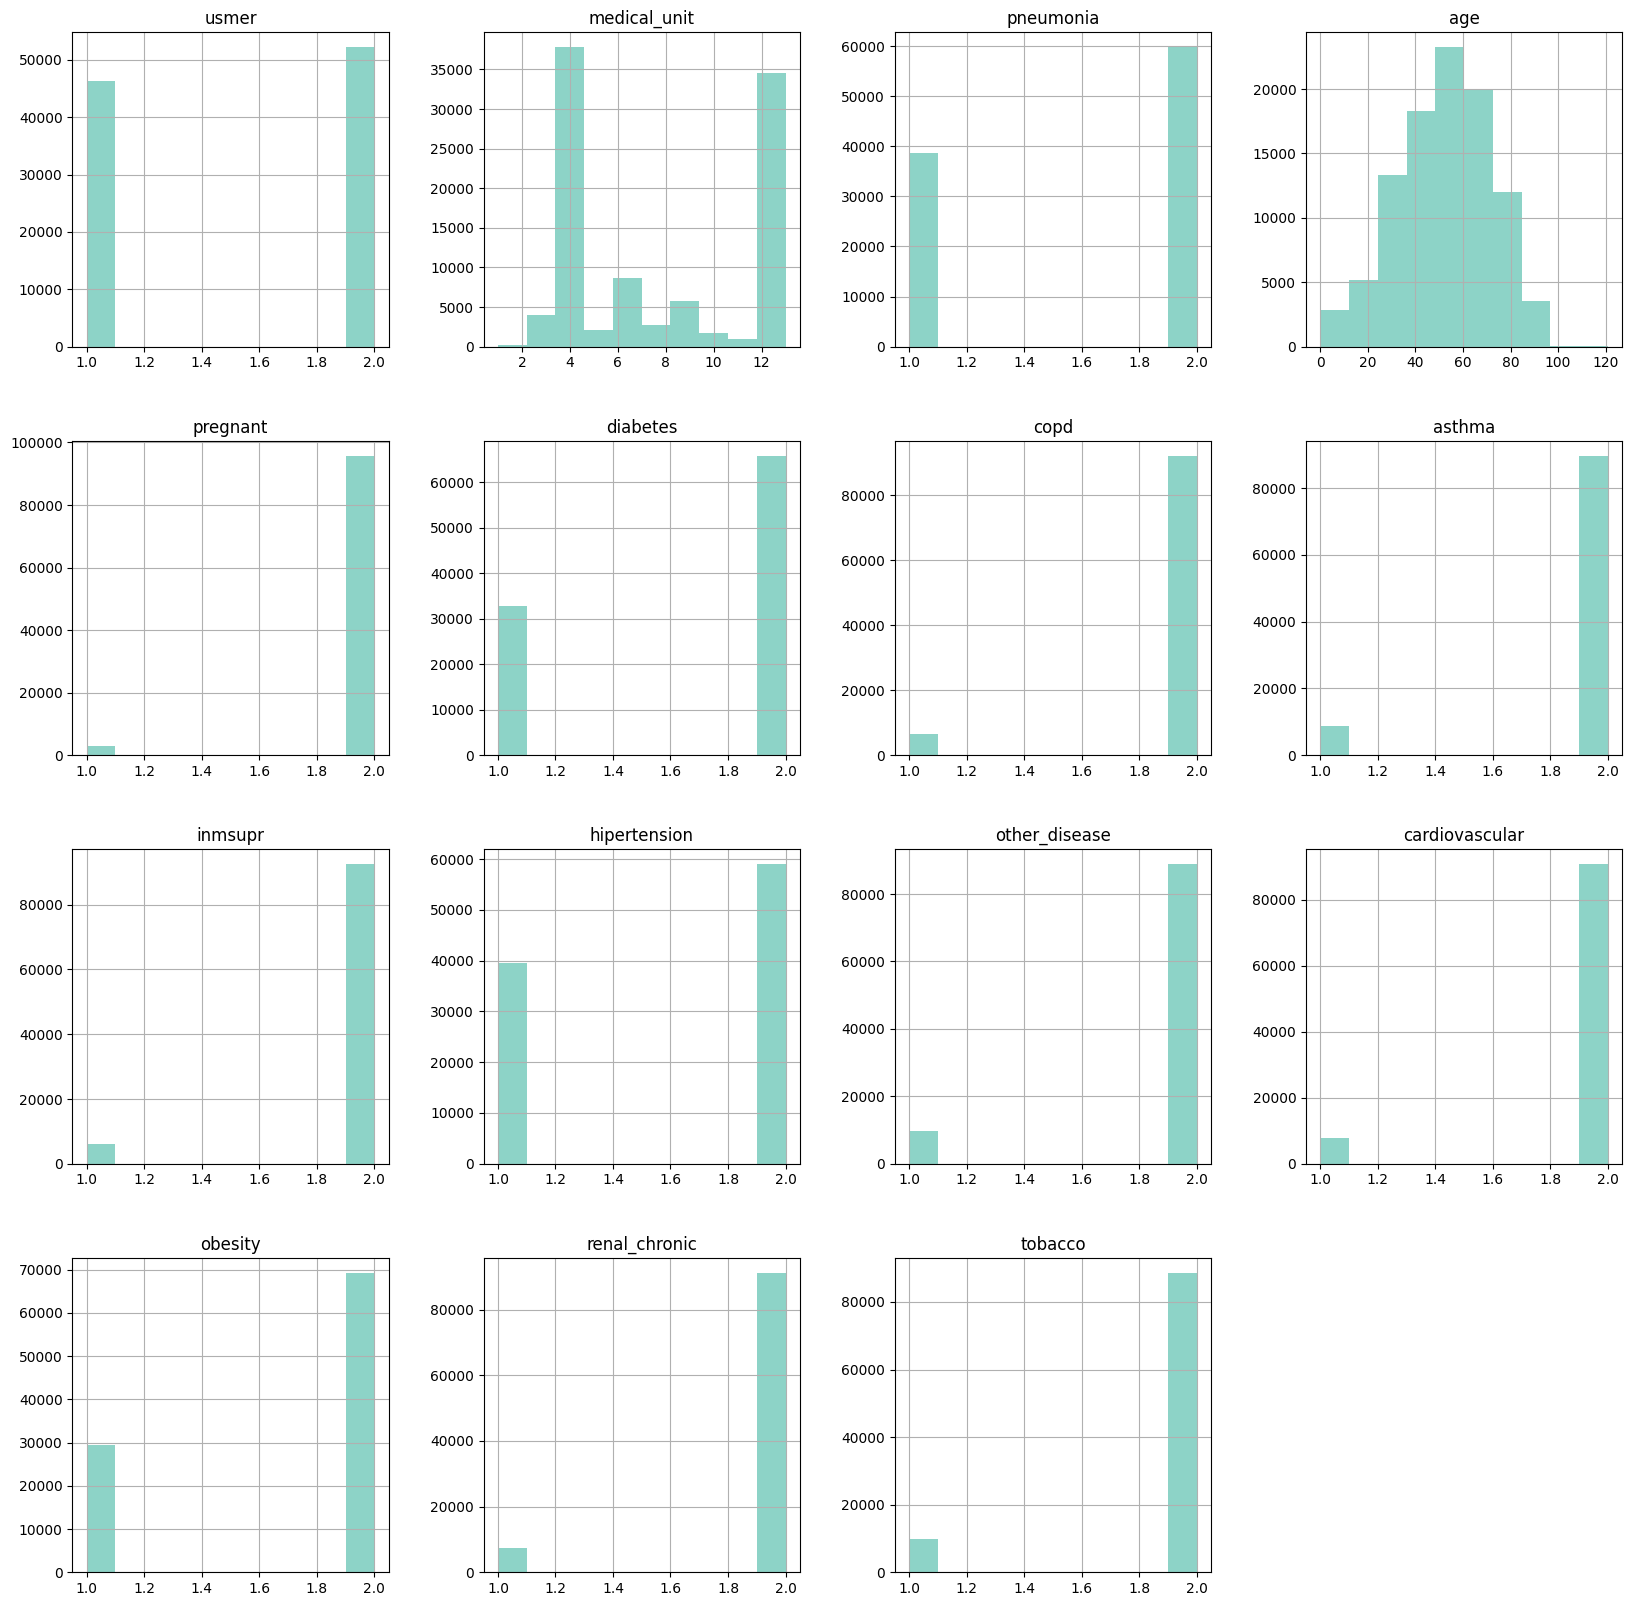

In [292]:
# Plotting all the numerical columns using histogram
df.hist(figsize=(20,20))
plt.show()

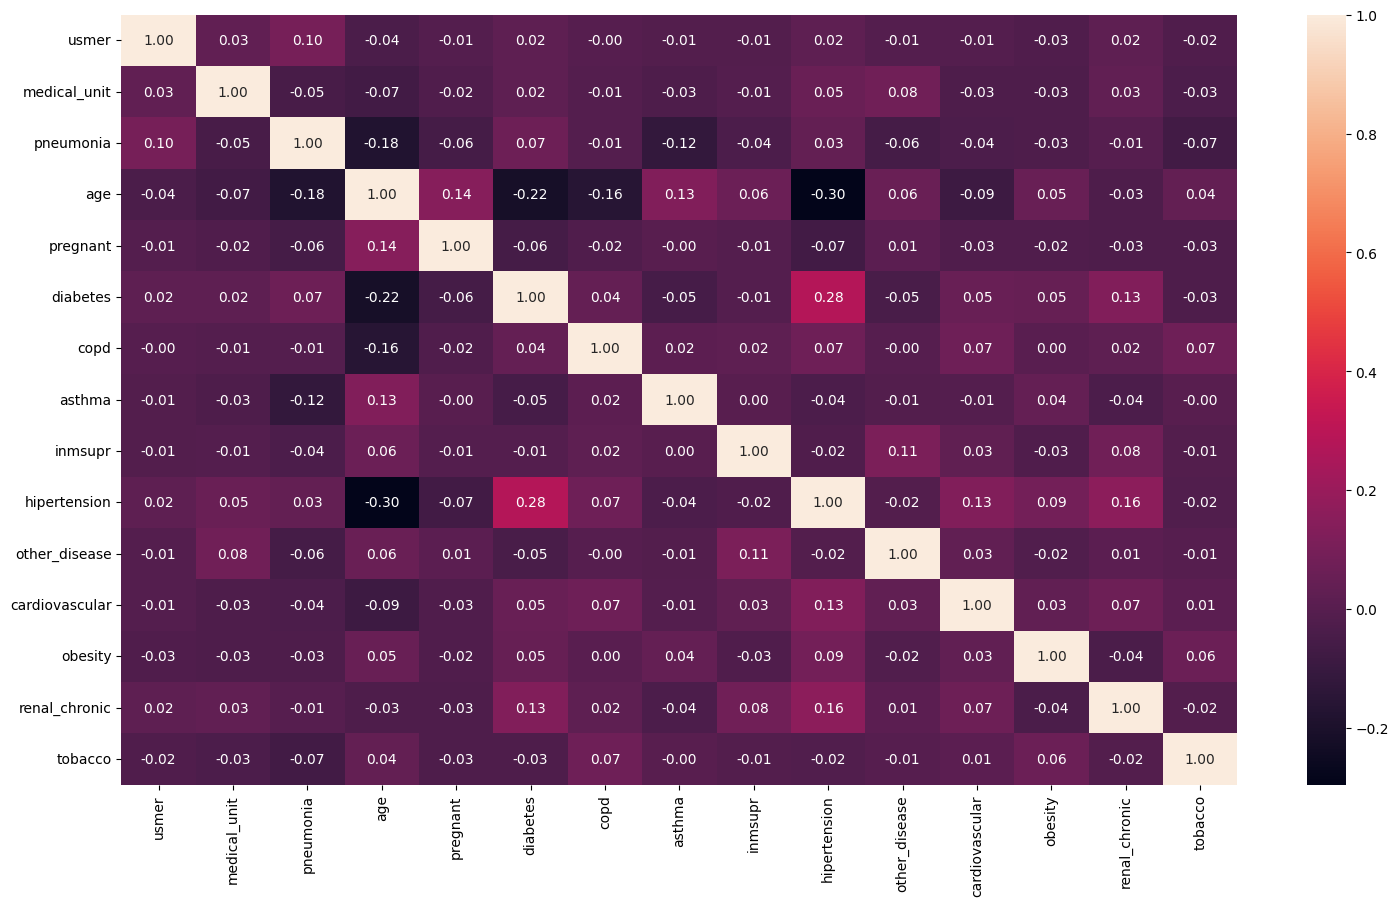

In [70]:
plt.figure(figsize=(18, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

#### Insights from the Data

1. Patients in hospitalization are those who have:

*   Pneumonia

*   Diabetes
*   Hypertension


*   Older Age

2.  Patients who returned home are:

*   High USMER (treated medical units)

*   Have light pneumonia disease

*   High medical unit (Treated by the institution of the National Health System)
*   Light diabetes and hypertension


*   Young age

3.  Patients who have Hypertension are:


*   Diabetes

*   Older Age
*  High number in Hospitalization

4.  Diabetes patients:

*   Old age

*  High number in hospitalization
*  Related to Pneumonia, Hypertension

5.  Older age patients have:

*   Pneumonia

*   Diabetes
*   Hypertension


*   COPD (Chromic obstructive pulmomary disease)

6.  Patient who have Pneumonia:

*  Old Age

*  Diabetes

*  Hypertension
*  Intubed (connected to the ventilator)


*  Need to be hospitalized

7.  Most death cases are related to:

*   Pneumonia

*   Old Age
*   Light Diabetic


*  Hospitalized